In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [3]:
data_frame = pd.read_csv('../../Dados/AirPassengers.csv')
data_frame = data_frame['#Passengers'].values
data_frame.shape

(144,)

In [4]:
model = auto_arima(data_frame, seasonal=True, m=12, trace=False)

In [5]:
print(model.order)

(2, 1, 1)


In [6]:
model = ARIMA(data_frame, order=(2,1,0))
model_fit = model.fit()

In [7]:
residuals = model_fit.resid

In [8]:
anomalies = np.where(np.abs(residuals) > 2 * np.std(residuals))[0]

In [9]:
anomalies

array([  0, 116, 122, 128, 137, 138, 140, 142], dtype=int64)

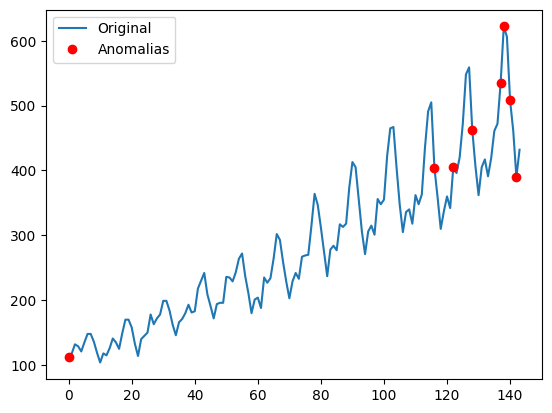

In [10]:
plt.plot(data_frame, label='Original')
plt.plot(anomalies, data_frame[anomalies], 'ro', markersize=6, label="Anomalias")
plt.legend()
plt.show()